# Introduction to Pytorch

PyTorch is an open-source machine learning library developed by Facebook's AI Research lab (FAIR). It's widely used for applications such as natural language processing and computer vision, primarily due to its flexibility and ease of use. PyTorch is known for its powerful tensor operations, which are similar to the arrays and matrices found in other programming languages, but optimized for deep learning. One of its standout features is dynamic computational graphing, allowing for mutable graphs that update and change as operations are added. 

## Tensors

Tensors in PyTorch are similar to arrays in other programming languages, but with additional capabilities that make them suitable for machine learning. A tensor is a generalized matrix, or in other words, an n-dimensional array where n can be any non-negative integer. For instance, a 0-dimensional tensor is a scalar, a 1-dimensional tensor is a vector, and a 2-dimensional tensor is a matrix.

Tensors are used in PyTorch for several reasons:

1. Efficiency: Tensors allow efficient storage and manipulation of data, which is crucial when dealing with large datasets and complex models in machine learning.
2. GPU Acceleration: Tensors can be moved to a GPU to accelerate computing, which is much faster compared to CPU computations.
3. Automatic Differentiation: PyTorch uses tensors to perform automatic differentiation, which is essential for training machine learning models.

In [2]:
import torch
import numpy as np

#### Tensors can be initialized in various ways. 
Take a look at the following examples:

In [12]:
# Create a tensor from a list
l = [1, 2, 3, 4]
a = torch.tensor(l)
print("Vector:", a)

# Create a 2x3 matrix
m = [[1, 2, 3], [4, 5, 6]]
b = torch.tensor(m)
print("Matrix:\n", b)

# Create a tensor from a 2x3 numpy array
np_array = np.array(m)
b_np = torch.from_numpy(np_array)
print("Matrix from Numpy:\n", b)

# Create a tensor of zeros
c = torch.zeros((3, 3))
print("Zero matrix:\n", c)

# Create a tensor with random values
d = torch.rand(3, 3)
print("Random matrix:\n", d)

Vector: tensor([1, 2, 3, 4])
Matrix:
 tensor([[1, 2, 3],
        [4, 5, 6]])
Matrix from Numpy:
 tensor([[1, 2, 3],
        [4, 5, 6]])
Zero matrix:
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
Random matrix:
 tensor([[0.4252, 0.7602, 0.8002],
        [0.7485, 0.3796, 0.8222],
        [0.6692, 0.5390, 0.4381]])


#### Tensor Attributes

In [7]:
print(f"Tensor: {b}")
print(f"Shape of tensor: {b.shape}")
print(f"Datatype of tensor: {b.dtype}")
print(f"Device tensor is stored on: {b.device}")

Tensor: tensor([[1, 2, 3],
        [4, 5, 6]])
Shape of tensor: torch.Size([2, 3])
Datatype of tensor: torch.int64
Device tensor is stored on: cpu


#### Tensor operations

In [5]:
# Addition
result = torch.add(a, 10)
print("Add 10:", result)

# Element-wise multiplication
result = a * a
print("Element-wise multiplication:", result)

# Matrix multiplication
result = torch.matmul(b, torch.tensor([[1, 0], [0, 1], [1, 1]]))
print("Matrix multiplication:\n", result)

# Mean of tensor
result = d.mean()
print("Mean of random matrix:", result)

Add 10: tensor([11, 12, 13, 14])
Element-wise multiplication: tensor([ 1,  4,  9, 16])
Matrix multiplication:
 tensor([[ 4,  5],
        [10, 11]])
Mean of random matrix: tensor(0.5434)


#### Standard numpy-like indexing and slicing:

In [14]:
print(c)
c[:,1] = 1
print(c)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])


#### Moving Tensors to GPU
To leverage GPU acceleration, you need to move your tensors to the GPU:

In [ ]:
if torch.cuda.is_available():
    a = a.to('cuda')
    print("Moved vector to GPU:", a)

print(f"Device tensor is stored on: {a.device}")

```Device tensor is stored on: cuda```

# Neural Networks

Neural networks in PyTorch are built using the torch.nn module, which provides all the building blocks needed to create your own neural network. These blocks include layers, activation functions, and loss functions, which can be combined to model complex patterns in data.

### Key Components of PyTorch for Neural Networks

- Tensors: As discussed earlier, tensors are the fundamental data structures in PyTorch, similar to matrices but with the ability to store data in higher dimensions. They are used to store the inputs, outputs, and parameters of a model.

- Modules: In PyTorch, every neural network is derived from the nn.Module base class. A module is a building block for neural networks; it encapsulates parameters, and provides a way for organizing computations. This can include layers, methods to set parameters, forward and backward propagations, and more. Essentially, it’s a self-contained component that defines how data should be processed.
- Parameters: Parameters are tensor subclasses that have a very special property — they are automatically added to the list of its module’s parameters, and will be considered by optimizers.
- Optimizers: PyTorch includes several optimization algorithms in torch.optim, like SGD, Adam, and RMSprop, which are used to update weights during training according to the gradients computed during backpropagation.

## Building a Simple Neural Network

The best way to intorduce you to Neural Netwroks is to go through an example, here we will build a simple animal image classification network called ```AnimalNet```. 

To build an animal image classification there are several steps that we are going to do:

- First import all the necessary libraries.
- Define the network architecture by subclassing ```nn.Module```
- Load the data that we are going to use for training and testing. For this example, we can use a dataset like [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), which contains images of different animal and vehicle classes.
- Train the network with an optimizer and loss function. 
- Then we will evaulate our model and test in on some animal images.

For this example I won't be going into the technical details of machine learning, this is more an introduction of how PyTorch works, however I will try to include useful links as we go where you may like to read further (i.e. loss functions, optimisers, etc)

### Imports:

We'll start by importing necessary PyTorch modules:

In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import torchvision

### Network Definition:

Next, define the network architecture by subclassing ```nn.Module```, and initialize the neural network layers in ```__init__```. Implement the forward pass in the forward method.

These neural network layers are also known a [convolution layers](https://www.geeksforgeeks.org/introduction-convolution-neural-network/).

In [65]:
class AnimalNet(nn.Module):
    def __init__(self):
        # The values chosen for the nn.Linear layers in a neural network design are significant as they define 
        # the architecture and capacity of the network to learn from the data. 
        super(AnimalNet, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 512)  # Input layer to hidden layer (flattened 32x32x3 images)
        self.fc2 = nn.Linear(512, 256)       # Hidden layer to hidden layer
        self.fc3 = nn.Linear(256, 128)       # Hidden layer to hidden layer
        self.fc4 = nn.Linear(128, 6)        # Hidden layer to output layer (10 classes)

    # x is the input tensor that contains the batch of images.
    # Each image is originally a 3D tensor (with dimensions for channels, height, and width).
    def forward(self, x):
        # Reshapes x into a 2D tensor where each image is flattened into a single vector of size 33232 (3072):
        x = x.view(-1, 3*32*32)  
        # The -1 is used to automatically calculate the appropriate number of rows based on the batch size. 
        # This is necessary because the input layer of the network (fc1) expects a 1D vector per image.

        # Applying the First Linear Layer and Activation Function:
        x = F.relu(self.fc1(x)) # applies the first linear transformation using weights and biases of the fc1 layer.

        # These lines repeat the pattern: applying a linear transformation followed by a ReLU activation. 
        # Each layer takes the output from the previous layer as its input, progressively transforming the data.
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))

        # Output Layer and Softmax Activation:
        return F.log_softmax(self.fc4(x), dim=1) 
        # This applies the final linear transformation to map the representations learned by the network to the number 
        # of classes in the task (10 in this case).

<details>
    <summary style="background-color: lightblue; padding: 5px;"><span style="color: black;"><strong>Extra info on nn.Linear:</strong></span></summary>
    <p><span style="color: green;"><strong>nn.Linear(33232, 512):</strong></span><br>
<strong>Input Features (33232)</strong> - This is the number of input features to the first layer of the neural network. The CIFAR-10 images are colored (RGB) and each image is 32x32 pixels. Therefore, each image consists of 3 color channels × 32 pixels (height) × 32 pixels (width) = 3,072 features. When you input an image to the network, it is typically flattened from a 3D tensor of shape (3, 32, 32) to a 1D tensor of shape (33232), which is a common practice for fully connected layers.<br>
<strong>Output Features (512)</strong> - This number defines how many neurons there are in the first hidden layer of the network. The choice of 512 neurons is somewhat arbitrary but is influenced by factors like the complexity of the task and the amount of available data. More neurons can potentially capture more complex patterns but also increase computational load and the risk of overfitting, especially with smaller datasets. The number 512 is a power of 2, which is often chosen due to how memory is allocated in many computing systems, potentially improving performance.</p>
<p><span style="color: green;"><strong>nn.Linear(512, 256):</strong></span><br>
<strong>Input Features (512)</strong> - This layer takes the output from the previous layer (512 features) as its input.<br>
<strong>Output Features (256)</strong> - This continues the pattern of creating a "funnel" where each subsequent layer has fewer neurons than the previous one. This design can help to condense the information from the high-dimensional input into increasingly abstract and useful representations. Halving the number of neurons in each layer (a common heuristic) helps in gradually reducing the dimensionality of the problem, which can aid in learning more generalized features.<br></p>
<p><span style="color: green;"><strong>nn.Linear(256, 128):</strong></span><br>
<strong>Input Features (256)</strong> - Inputs from the second layer are fed into the third.<br>
<strong>Output Features (128)</strong> - Further reduces the complexity and continues the pattern of halving. This reduction helps in focusing the network on the most important features to make decisions.<br></p>
<p><span style="color: green;"><strong>nn.Linear(128, 10):</strong></span><br>
<strong>Input Features (128)</strong> - Takes outputs from the previous layer.<br>
<strong>Output Features (10)</strong> - This is determined by the number of classes in the CIFAR-10 dataset. Each of the 10 output units corresponds to one of the classes (like cats, dogs, birds, etc.), which the network will learn to predict.<br></p>
</details>

- The ```forward()``` function is an important part of defining neural networks in PyTorch. It specifies how the input data is transformed as it passes through the network, essentially defining the computation that occurs within the network. This is where you apply layers, activation functions, and other computational steps to the input tensors.

- ```F.relu()``` is the Rectified Linear Activation Function [(ReLU)](https://www.geeksforgeeks.org/activation-functions-in-pytorch/) applied element-wise. It introduces non-linearity into the model, allowing it to learn more complex patterns. ReLU is defined as ```f(x) = max(0, x)``` , which sets all negative values in the input tensor to zero.

- ```F.log_softmax()``` is applied to the output of the final layer. This function computes the logarithm of the softmax of the input tensor. Softmax converts the logits (raw predictions) into probabilities by taking the exponentials of each output and then normalizing these values by dividing by the sum of all exponentials; this ensures that the output values are between 0 and 1 and sum to 1.

The ```forward()``` function is automatically invoked when you call the model on an input batch of data, e.g., ```output = model(data)```. The backward pass, used to compute gradients during training, is automatically defined by PyTorch using autograd based on the operations specified in the forward() function. This makes implementing complex neural networks more straightforward, as the user only needs to define the forward computation.

### Data Loading and Preprocessing:

One of the main tasks when building your machine learning model is preparing your training and testing data.

In this example we are using the  [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. This dataset contains images of animals but it also contains images of vehicles like cars/trains/planes/etc. We need to filter this dataset so that it only contains the classes we want, like birds, cats, dogs, and other animals.

In [66]:
# Custom dataset to filter only animal classes
class AnimalCIFAR10(Dataset):
    def __init__(self, root, train=True, transform=None, download=False):
        self.cifar10 = datasets.CIFAR10(root=root, train=train, transform=transform, download=download)
        self.animal_classes = [2, 3, 4, 5, 6, 7]  # Indices of animal classes in CIFAR-10
        self.animal_class_map = {2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5}  # Map original class to new class index
        self.data = []
        self.targets = []

        for i in range(len(self.cifar10)):
            if self.cifar10.targets[i] in self.animal_classes:
                self.data.append(self.cifar10.data[i])
                self.targets.append(self.animal_class_map[self.cifar10.targets[i]])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img, target = self.data[idx], self.targets[idx]
        if self.cifar10.transform is not None:
            img = self.cifar10.transform(img)
        return img, target

In [68]:
# Data loading ino tensors and transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the RGB channels
])

# Load in our training data from CIFAR10
train_dataset = AnimalCIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=6, shuffle=True)

# Load in our testing data from CIFAR10
test_dataset = AnimalCIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=6, shuffle=False)

animal_classes = ['bird', 'cat', 'deer', 'dog', 'frog', 'horse']

Files already downloaded and verified
Files already downloaded and verified


Lets show what some of the images look like:

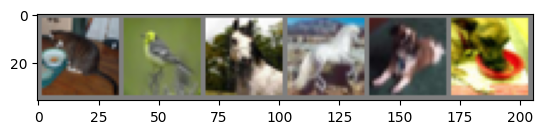

cat   bird  horse horse dog   dog  


In [69]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{animal_classes[labels[j]]:5s}' for j in range(6)))

### Training the Network

Set up the optimizer, define the loss function, and implement the training loop. 

Somne details: 

- We are using the [Adam optimize](https://www.geeksforgeeks.org/adam-optimizer/?ref=header_search) which is good for image classification.
- Our loss function is the [Cross Entropy Loss](https://www.geeksforgeeks.org/what-is-cross-entropy-loss-function/?ref=header_search) function.

In [76]:
# Model, Optimizer and Loss
model = AnimalNet() # initializes an instance of the AnimalNet model.
optimizer = optim.Adam(model.parameters(), lr=0.001) # This sets up the Adam optimizer to adjust the model’s parameters with a learning rate of 0.001.
# The Adam optimizer is a popular choice for training deep learning models due to its efficiency and effectiveness.
loss_fn = nn.CrossEntropyLoss() # specifies the loss function to be used, common for classification problems.

for epoch in range(20):  # loop over the dataset multiple times

    # Mini-batch Training:
    running_loss = 0.0 # This variable keeps track of the cumulative loss within an epoch.
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad() # Clears the gradients of all optimized parameters. 
        # This is important because by default, gradients are accumulated in PyTorch.

        # forward + backward + optimize
        outputs = model(inputs) # Pass the data through the model to get the predicted outputs.
        loss = loss_fn(outputs, labels) # Calculate the loss by comparing the model’s predictions with the actual labels.
        loss.backward() # Calculate the gradients of the loss with respect to the model parameters.
        optimizer.step() # Update the model parameters based on the computed gradients.

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.613
[1,  4000] loss: 1.477
[2,  2000] loss: 1.382
[2,  4000] loss: 1.380
[3,  2000] loss: 1.315
[3,  4000] loss: 1.308
[4,  2000] loss: 1.226
[4,  4000] loss: 1.269
[5,  2000] loss: 1.188
[5,  4000] loss: 1.197
[6,  2000] loss: 1.128
[6,  4000] loss: 1.160
[7,  2000] loss: 1.086
[7,  4000] loss: 1.104
[8,  2000] loss: 1.031
[8,  4000] loss: 1.064
[9,  2000] loss: 0.979
[9,  4000] loss: 1.026
[10,  2000] loss: 0.923
[10,  4000] loss: 0.970
[11,  2000] loss: 0.897
[11,  4000] loss: 0.929
[12,  2000] loss: 0.855
[12,  4000] loss: 0.897
[13,  2000] loss: 0.828
[13,  4000] loss: 0.848
[14,  2000] loss: 0.779
[14,  4000] loss: 0.822
[15,  2000] loss: 0.739
[15,  4000] loss: 0.794
[16,  2000] loss: 0.707
[16,  4000] loss: 0.753
[17,  2000] loss: 0.684
[17,  4000] loss: 0.734
[18,  2000] loss: 0.654
[18,  4000] loss: 0.705
[19,  2000] loss: 0.638
[19,  4000] loss: 0.684
[20,  2000] loss: 0.611
[20,  4000] loss: 0.656
Finished Training


### Evaluate the model

Now that we created our AnimalNet() model and trained it on data we want to see how well it's performing:

In [77]:
# Evaluating the Model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # Disable gradient computation
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Accuracy: {100 * correct / total}%')

Accuracy: 50.666666666666664%


~50% ism't terrible considering we only ran our model for a few mins over 20 epochs. To improve this there are several things we can do:
- Run over many more epochs
- Try different optimizers, loss functions
- Try a bigger batch size, here we only had 6.
- Try a different convolution layer set-up

A lot of the time, creating the 'perfect' machine learnign model for your task involves a bit of trial and error. There are always the recommened options for the convolution layers, loss function, and optimizer but you will always need to tweak these. It's about testing and seeing which settings give you the optimal result.

Now let's test our model on 6 random images, first we'll plot the 'ground truth':

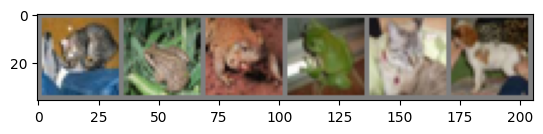

GroundTruth:  cat   frog  frog  frog  cat   dog  


In [78]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{animal_classes[labels[j]]:5s}' for j in range(6)))

And now we plot what the model thinks those 6 images are:

In [79]:
outputs = model(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{animal_classes[predicted[j]]:5s}'
                              for j in range(6)))

Predicted:  cat   deer  frog  frog  cat   horse


Our model actually got 4 out of 6 correct which is slightly better than the ~50% accuracy from the model evaluation step. To see a potential reason for the better accuracy let's see how accurate the model is for each animal class it has been trained on:

In [80]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in animal_classes}
total_pred = {classname: 0 for classname in animal_classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[animal_classes[label]] += 1
            total_pred[animal_classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: bird  is 45.8 %
Accuracy for class: cat   is 36.2 %
Accuracy for class: deer  is 52.5 %
Accuracy for class: dog   is 49.2 %
Accuracy for class: frog  is 55.9 %
Accuracy for class: horse is 64.4 %


# Running this model on a GPU

GPUs offer a great advantage over CPUs when it comes to machine leanring. Training and running your model on a GPU/s can be significantly faster. Let's redo the above but on a GPU instead and see what needs to be changed in the code. 

Note that for this code to work you will need to be using a machine that has CUDA installed, see [pytorch + cuda](https://pytorch.org). Thankfully CUDA is installed in some environments on GADI like dk92: [dk92 NCI](https://opus.nci.org.au/display/DAE/RAPIDS)

### Check that a GPU is available

In [ ]:
# Check if a GPU is available and use it
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

We don't need to change anything about our AnimalNet Class and AnimalCIFAR10 setup so I won't add that here again. 

Let's skip to the code where we initialize our model and do the training. There are 2 things we need to change here:
- We need to move our model to the GPU
- We need to move out data/inputs to the GPU

In [ ]:

##########!!!!!!!!###########
model = AnimalNet().to(device) # Move the model to the GPU
##########!!!!!!!!###########

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        ##########!!!!!!!!###########
        inputs, labels = inputs.to(device), labels.to(device) # Move the data to the GPU
        ##########!!!!!!!!###########

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Then when we want to evaulate the model:

In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        ##########!!!!!!!!###########
        data, target = data.to(device), target.to(device)  # Move teasting data to the GPU
        ##########!!!!!!!!###########
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Accuracy: {100 * correct / total}%')

And finally, to test the model on some of the testing images you just need to transfer those images to the GPU to pass to the model:

In [ ]:
# Run the model on the test images
##########!!!!!!!!###########
outputs = model(images.to(device))
##########!!!!!!!!###########

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(12)))

## More Info

- Pytorch website: https://pytorch.org/tutorials/

- Using Pytorch to downscale an Evapotranspiration dataset (built by Sanaa + Sam): https://github.com/coecms/Hybrid_downscaling

In [39]:
num_models = 10
models = [AnimalNet() for _ in range(num_models)]

In [40]:
for i, model in enumerate(models):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()
    model.train()  # Set the model to training mode

    for epoch in range(15):  # Number of epochs
        for data, target in train_loader:
            optimizer.zero_grad()               # Clear the gradients
            output = model(data)                # Pass the data through the model
            loss = loss_fn(output, target)      # Calculate the loss
            loss.backward()                     # Backpropagate the error
            optimizer.step()                    # Update the weights

    print(f'Model {i+1} trained.')

Model 1 trained.
Model 2 trained.
Model 3 trained.
Model 4 trained.
Model 5 trained.
Model 6 trained.
Model 7 trained.
Model 8 trained.
Model 9 trained.
Model 10 trained.


In [41]:
def average_predictions(models, data_loader):
    total_preds = None
    model.eval()  # Set models to evaluation mode

    with torch.no_grad():
        for data, _ in data_loader:
            outputs = [model(data) for model in models]
            # Stack outputs to create a new dimension and then take the mean across models
            outputs = torch.stack(outputs, dim=0).mean(dim=0)
            
            if total_preds is None:
                total_preds = outputs
            else:
                total_preds = torch.cat((total_preds, outputs), dim=0)

    return total_preds

# Get average predictions on the test set
average_preds = average_predictions(models, test_loader)

# If using logits, apply softmax to convert to probabilities
probabilities = F.softmax(average_preds, dim=1)
predicted_classes = probabilities.argmax(dim=1)

In [42]:
correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        output = average_predictions(models, [(data, target)])
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Ensemble accuracy: {100 * correct / total}%')

Ensemble accuracy: 60.17%
